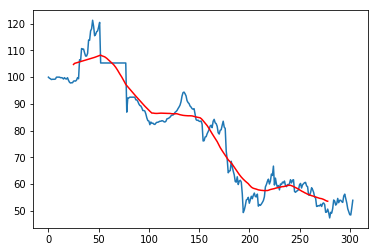

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv("exchange-rate-twi.csv")
df1.head()

width = 51
# Tail-rolling average transform
rolling = df1["Exchange Rate TWI"].rolling(window=width, center=True)
rolling_mean = rolling.mean()
# plot original and transformed dataset
df1["Exchange Rate TWI"].plot()
rolling_mean.plot(color='red')
plt.show()

In [11]:
df1 = df1.set_index('Month')
y = pd.Series(df1['Exchange Rate TWI'])

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# if this gives an error update the statsmodel package using the code pip install statsmodels==0.9.0rc1

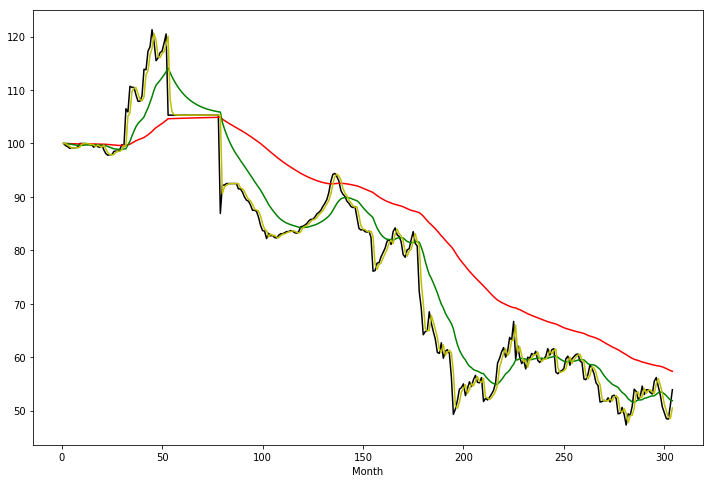

In [13]:
fit1 = ExponentialSmoothing(y).fit(smoothing_level=0.02,optimized=False)
fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.1,optimized=False)
fit3 = ExponentialSmoothing(y).fit(smoothing_level=0.8,optimized=False)
plt.figure(figsize = [12,8])
plt.plot(y, color = 'black')
fit1.fittedvalues.plot(color = 'r')
fit2.fittedvalues.plot(color = 'g')
fit3.fittedvalues.plot(color = 'y')